In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
image = cv2.imread("1.jpg")

In [29]:
def plot_images(img1, img2):
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2)

In [30]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0):
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    return sharpened

In [31]:
sharp = unsharp_mask(image)

cv2.imwrite("sharp.png", sharp)

True

In [32]:
gray = cv2.cvtColor(sharp, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray.png", gray)


True

In [33]:
blur = cv2.bilateralFilter(gray, 10,75, 75)
cv2.imwrite("blur.png", blur)


True

In [34]:
edges = cv2.Canny(blur, 30, 200)
cv2.imwrite("edges.png", edges)

True

In [35]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


In [36]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,0),2)

cv2.imwrite("contours.png", _)

True

In [37]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edge_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edge_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w] #image cropping
        break

cv2.imwrite("plate.png", plate)


True

MY70 BMW



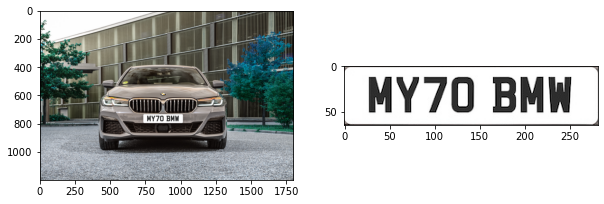

In [38]:
import pytesseract as pt
pt.pytesseract.tesseract_cmd=r'C:\Users\Gunjan Paghdar\Desktop\Number Plate Detection\Number Plate Images\Tesseract-OCR\tesseract.exe'
text = pt.image_to_string(plate, lang="eng")
print(text)
plot_images(image, plate)